<a href="https://colab.research.google.com/github/Felife11/SkillTreePython-DeepLearning/blob/main/00.%EC%B6%94%EA%B0%80%ED%95%99%EC%8A%B5/ch00_01_OpenCV%EA%B8%B0%EC%B4%88_%EA%B8%B0%EB%B3%B8%EC%82%AC%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch00.01. OpenCV기초 - 기본사용

---
* 날짜: 2022-06-16
* 이름: 정성대

## 학습내용
    - OpenCV 이해하기
    - OpenCV를 이용한 이미지 읽기
    - OpenCV를 이용한 이미지 보기
    - OpenCV를 이용한 이미지 Processing
    - 이미지 저장하기


## 학습자료
- [OpenCV 홈페이지](https://opencv.org/)

- [OpenCV-pythoin Documentation](https://opencv-python.readthedocs.io/en/latest/)

```
import numpy as np
import matplotlib.pyplot as plt
import cv2
cv2.__version__
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


'4.1.2'

## OpenCV 소개
---

- 영상처리 라이브러리
- 씨플플로 시작하여 3.0 파이썬 자바 제공 
- 딥러닝 라이브러리 대부분이 현재 파이썬


디지털 이미지를 편집할 때 가장 많이 사용되는  파일 유형

![](https://t1.daumcdn.net/cfile/tistory/2217E149551375980F)

#### **벡터(vector) 그래픽스**
반응형 화면 
전체하면-휴대폰화면 에서 비율을 깨지지 않고 보여줄 수 있다.


#### **레스터(raster) 그래픽스**

비트맵, 알지비
오픈시브이 에서는 레스터 그래픽스 사용


## 이미지 읽기 및 보기
---


### **| 이미지 읽기**


#### `cv2.imread(fileName), flage`
* return : 넘파이 배열

#### **이미지 파일 준비**

* 파일 업로드

```
from google.colab import files
upload_file = files.upload()
```

In [23]:
from google.colab import files
upload_file = files.upload()

Saving mg.jpg to mg.jpg


* 파일 경로 설정

In [24]:
f_path = '/content/p1.jpg'
m_path = '/content/mg.jpg'
i_path = '/content/im.jpg'

#### **Matplotlib과 비교**

* Matplolib: RGB
  * 이미지 불러오기 : plt.imread() -> RGB로 읽어옴
  * 이미지 보여주기 : plt.imshow()
* OpenCV : GBR
  * 이미지 불러오기 : cv2.imread() -> GBR로 읽어옴
  * 이미지 보여주기 : cv2.imshow()



In [34]:
# 이미지 읽기(불러오기)
plt_img = plt.imread(f_path) # R, G, B
cv2_img = cv2.imread(f_path) # B, G, R
plt_img2 = plt.imread(i_path) # R, G, B
cv2_img2 = cv2.imread(i_path) # B, G, R
plt_img3 = plt.imread(m_path) # R, G, B
cv2_img3 = cv2.imread(m_path) # B, G, R

* '이미지' 데이터

In [35]:
plt_img.shape
plt_img2.shape
plt_img3.shape

(480, 720, 3)

### **| 이미지 보기**

#### **코랩 imshow 패치 함수**

* 원래 함수 : 코랩에서 사용불가

```
cv2.imshow(name, image)
```

In [10]:
cv2.imshow('', cv2_img)

DisabledFunctionError: ignored

* 코랩용 패치 함수

```
from google.colab.patches import cv2_imshow
cv2_imshow(cv2_img)
```

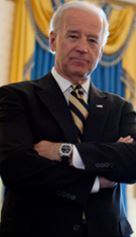

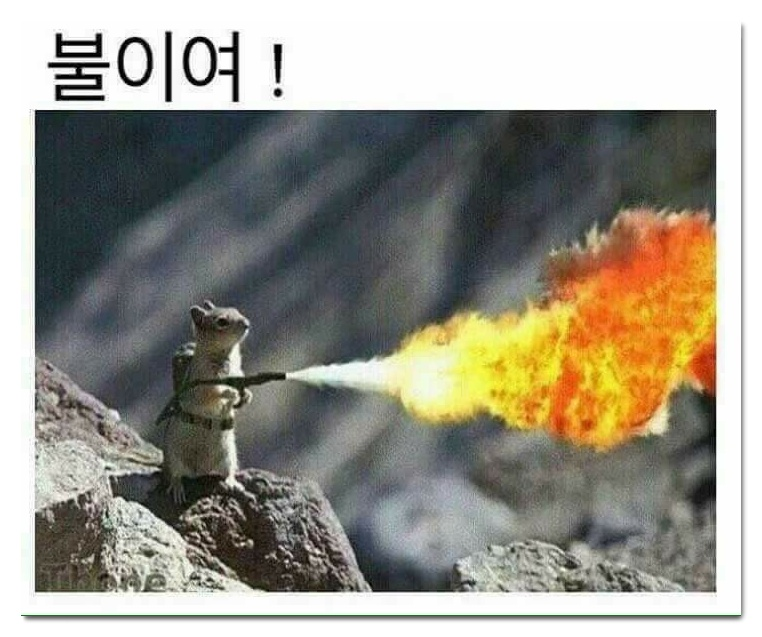

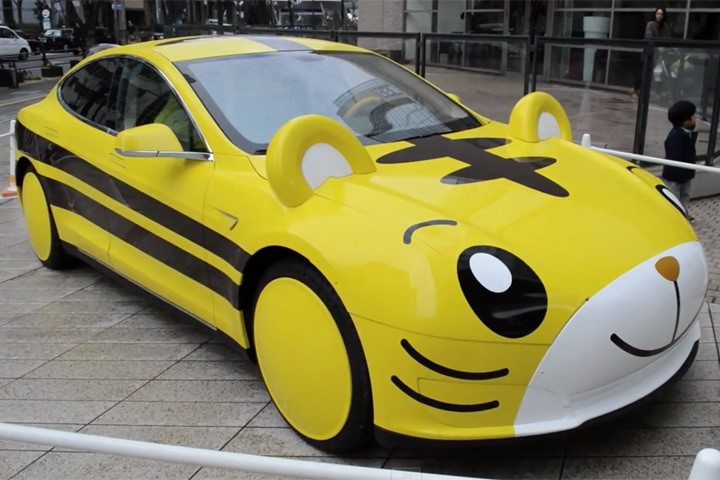

In [38]:
from google.colab.patches import cv2_imshow
cv2_imshow(cv2_img)
cv2_imshow(cv2_img2)
cv2_imshow(cv2_img3)

In [37]:
cv2_img.shape
cv2_img2.shape
# 이미지의 세로사이즈 : 237
# 이미지의 가로사이즈 : 136
# 이미지의 채널(색상) : 3채널(RGB)

(637, 762, 3)

#### **matplotlib으로 이미지 보기**

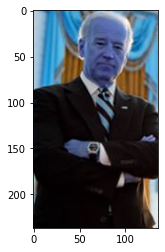

In [15]:
plt.imshow(cv2_img)

## 이미지 Processing
---

**이미지 좌표 형식**

디지털 영상은 2차원 행렬의 형태로 표현이 되며. 각 격자가 하나의 pixel이 됩니다. 
![](https://opencv-python.readthedocs.io/en/latest/_images/image1.png)

### **| Digital Image의 유형**

#### **Binary Image**

Binary Image는 pixel당 1bit로 표현하는 영상을 의미합니다. 즉 흰색과 검은색으로만 표현이 되는 영상입니다.

![](https://opencv-python.readthedocs.io/en/latest/_images/image2.png)


* 우측 상단 : thresholding처리를 하여 binary image로 변환
* 우측 하단 : binary image의 밀도를 조절하여 밝기를 표현 

#### **Grayscale Image**

![](https://opencv-python.readthedocs.io/en/latest/_images/image3.png)

Grayscale Image는 Pixel당 8bit, 즉 256단계의 명암(빛의 세기)을 표현할 수 있는 이미지입니다.

#### **Color Image**

* pixel의 색을 표현하기 위해서 채널별 pixel당 8bit 사용(0~255)
* 총 16,777,216 가지의 색을 표현 (256x256x256)


#### **RGB Clor-space vs HSV color-space**


![](https://opencv-python.readthedocs.io/en/latest/_images/image5.png)
![](https://opencv-python.readthedocs.io/en/latest/_images/image6.png)

* RGB : 빛의 삼원색의 3채널 
* HSV : 색, 채도, 명도의 3채널

### **| Color-space 변환**

#### `cv2.cvtColor(src, code)`
* Parameters:
  * src : 이미지 배열
  * code : 변환 코드

In [17]:
# BGR -> RGB
rgb_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)

* plt로 변환 이미지 확인하기

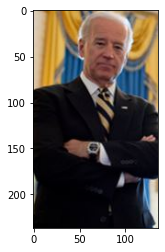

In [18]:
plt.imshow(rgb_img)

* cv2로 변환 이미지 확인하기

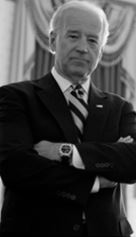

In [21]:
gray_img = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

## 이미지 저장
---

#### `cv2.imwrite(fileName, image)`
* Parameters
  * fileName(str) : 저장될 파일명
  * image : 저장할 이미지

In [40]:
cv2.imwrite('car.png', cv2_img3)

True

## 이미지
---
# 동물사진
# 자동차사진

#### `cv2.imwrite(fileName, image)`
* Parameters
  * fileName(str) : 저장될 파일명
  * image : 저장할 이미지